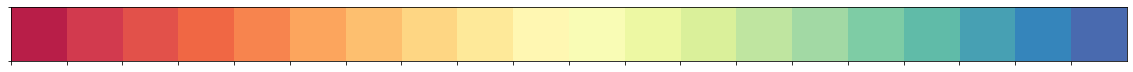

In [17]:
import pandas as pd
import numpy as np
import scipy 
import seaborn as sns
from matplotlib import pyplot as plt
import re
from matplotlib.ticker import MaxNLocator
import squarify
import textwrap3
from textwrap3 import wrap
import random2
from natsort import natsort_keygen
import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

pal = sns.color_palette("Spectral", 20)
customPalette = pal.as_hex()
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [24]:
instructions = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/instructions_homogenuous_clusters_archaea_smash.tsv',
                          sep='\t', header=None, names=['Query', 'cluster'])
instructions_homologs = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/instructions_common_kegg_ids__kegg_groups_AB.tsv',)


instructions_homologs

cluster        ids                      protein
0         15    a_18692   GUT_GENOME068480.fasta_744
1         15    a_18692  GUT_GENOME267332.fasta_1526
2         15    a_18692    GUT_GENOME257522.fasta_13
3         15    a_18692   GUT_GENOME090851.fasta_340
4         15    a_18692   GUT_GENOME064456.fasta_642
..       ...        ...                          ...
829        4  b_8534464       GUT_GENOME056587_133_1
830        4  b_8534464            3300029103_13_853
831        4  b_8534464        GUT_GENOME117933_50_2
832        4  b_8534464        GUT_GENOME071091_90_2
833        4  b_8534464         GUT_GENOME233766_1_6

[834 rows x 3 columns]

In [3]:
descriptions = pd.read_csv('/work/projects/archaeome/coevolution/annotation_archaea/archaea_annot_kegg.tsv',
           sep='\t', names=['Query', 'Ref_hit', 'Description'])
descriptions

Query Ref_hit  \
0                    2009439000_2_15  K06174   
1                  2009439000_2_1173  K07023   
2                  2009439000_2_1150  K03167   
3                   2009439000_2_747  K00104   
4                  2009439000_2_1188  K02492   
...                              ...     ...   
5942291   GUT_GENOME286660.fasta_807  K07557   
5942292   GUT_GENOME286660.fasta_507  K08303   
5942293   GUT_GENOME286660.fasta_639  K00809   
5942294   GUT_GENOME286660.fasta_195  K02932   
5942295  GUT_GENOME286660.fasta_1019  K00672   

                                               Description  
0             ATP-binding cassette, sub-family E, member 1  
1                    putative hydrolases of HD superfamily  
2                           DNA topoisomerase VI subunit B  
3                                        glycolate oxidase  
4                                  glutamyl-tRNA reductase  
...                                                    ...  
5942291                 archaeosine synthase alpha-subunit  
5942292                               U32 family peptidase  
5942293                             deoxyhypusine synthase  
5942294                large subunit ribosomal protein L5e  
5942295  formylmethanofuran--tetrahydromethanopterin N-...  

[5942296 rows x 3 columns]

In [4]:
annot = pd.read_csv('/work/projects/archaeome/coevolution/annotation_archaea/archaea_annot_kegg_locations.tsv',
           sep='\t')
annot.sort_values(by='Query', key=natsort_keygen(), ascending=True, inplace=True)
annot = annot[['Query', 'Ref_hit', 'Query_length', 'Query_hit_start', 'Query_hit_end']]


In [5]:
annot = annot.merge(descriptions, on=['Query', 'Ref_hit'])

In [6]:
annot[['Query0', 'Query1', 'Query2']] = pd.DataFrame([ x.split('_') for x in annot['Query'].tolist() ])
# annot['Query1'] = annot['Query1'].astype(int)
annot['Query2'] = annot['Query2'].astype(int)

##### Example


if last character is < 5

In [ ]:
# protein = 'GUT_GENOME111483.fasta_1690'

# annot[annot.Query.str.startswith(protein)].head(1)

# annot[(annot.Query.str.match('^'+protein[:-2]+str(int(protein[:-1].strip()[-1])-1)+'.$') == True) 
#       | annot.Query.str.match('^'+protein[:-1]+'.$') == True]

if last character >5 

In [ ]:
# protein = 'GUT_GENOME135949.fasta_46'

# annot[annot.Query.str.startswith(protein)].head(1)

# annot[(annot.Query.str.match('^'+protein[:-2]+str(int(protein[:-1].strip()[-1])+1)+'.$') == True) 
#       | annot.Query.str.match('^'+protein[:-1]+'.$') == True]

In [12]:
protein = 'GUT_GENOME283326.fasta_657'

In [13]:
annot[(annot.Query.str.contains(protein.split('.')[0])) 
      & ((annot.Query2>=int(protein.split('_')[2])-20)
     & (annot.Query2<=int(protein.split('_')[2])+20))]

Query Ref_hit  Query_length  Query_hit_start  \
5893108  GUT_GENOME283326.fasta_638  K01814           230                1   
5893109  GUT_GENOME283326.fasta_639  K07329           132                5   
5893110  GUT_GENOME283326.fasta_641  K16264           300                1   
5893111  GUT_GENOME283326.fasta_642  K04763           385                2   
5893112  GUT_GENOME283326.fasta_647  K08507           161               15   
5893113  GUT_GENOME283326.fasta_650  K07172            54                1   
5893114  GUT_GENOME283326.fasta_657  K10436           104                3   
5893115  GUT_GENOME283326.fasta_658  K11548           139               12   
5893116  GUT_GENOME283326.fasta_659  K09900           120                1   
5893117  GUT_GENOME283326.fasta_667  K11695           100                2   
5893118  GUT_GENOME283326.fasta_669  K06909           453                2   
5893119  GUT_GENOME283326.fasta_676  K02218           122                3   

         Query_hit_end                                        Description  \
5893108            229  phosphoribosylformimino-5-aminoimidazole carbo...   
5893109            125                    archaeal flagellar protein FlaF   
5893110            299          cobalt-zinc-cadmium efflux system protein   
5893111            381                         integrase/recombinase XerD   
5893112            131  unconventional SNARE in the endoplasmic reticu...   
5893113             53                                     antitoxin MazE   
5893114             99       microtubule-associated protein, RP/EB family   
5893115            134                           kinetochore protein Nuf2   
5893116            105                   N4-acetylcytidine amidohydrolase   
5893117             89  peptidoglycan pentaglycine glycine transferase...   
5893118            439                      phage terminase large subunit   
5893119            120                                    casein kinase 1   

        Query0              Query1  Query2  
5893108    GUT  GENOME283326.fasta     638  
5893109    GUT  GENOME283326.fasta     639  
5893110    GUT  GENOME283326.fasta     641  
5893111    GUT  GENOME283326.fasta     642  
5893112    GUT  GENOME283326.fasta     647  
5893113    GUT  GENOME283326.fasta     650  
5893114    GUT  GENOME283326.fasta     657  
5893115    GUT  GENOME283326.fasta     658  
5893116    GUT  GENOME283326.fasta     659  
5893117    GUT  GENOME283326.fasta     667  
5893118    GUT  GENOME283326.fasta     669  
5893119    GUT  GENOME283326.fasta     676

##### fetch nighbors for the entire cluster

In [17]:
instructions[instructions.cluster == 1]

Query  cluster
0    GUT_GENOME139173.fasta_357        1
1    GUT_GENOME105868.fasta_196        1
2    GUT_GENOME104819.fasta_673        1
3    GUT_GENOME048336.fasta_939        1
4    GUT_GENOME280278.fasta_484        1
5    GUT_GENOME193668.fasta_310        1
6    GUT_GENOME256362.fasta_202        1
7    GUT_GENOME259041.fasta_443        1
8    GUT_GENOME052919.fasta_406        1
9    GUT_GENOME283401.fasta_341        1
10   GUT_GENOME074458.fasta_913        1
11   GUT_GENOME284876.fasta_198        1
12   GUT_GENOME160306.fasta_424        1
13  GUT_GENOME160444.fasta_1288        1
14   GUT_GENOME258265.fasta_548        1
15   GUT_GENOME139871.fasta_115        1
16   GUT_GENOME170034.fasta_238        1
17     GUT_GENOME121298.fasta_2        1
18   GUT_GENOME162514.fasta_510        1
19   GUT_GENOME252492.fasta_380        1
20   GUT_GENOME175078.fasta_242        1
21   GUT_GENOME273595.fasta_351        1
22  GUT_GENOME135456.fasta_1233        1
23   GUT_GENOME020752.fasta_850        1
24  GUT_GENOME115540.fasta_1642        1
25   GUT_GENOME270475.fasta_946        1
26   GUT_GENOME088738.fasta_371        1
27   GUT_GENOME265025.fasta_848        1
28  GUT_GENOME267347.fasta_1627        1
29   GUT_GENOME268378.fasta_785        1
30   GUT_GENOME269576.fasta_378        1
31  GUT_GENOME267102.fasta_1246        1
32   GUT_GENOME089352.fasta_414        1
33   GUT_GENOME259685.fasta_160        1
34    GUT_GENOME258262.fasta_64        1
35   GUT_GENOME197579.fasta_179        1
36   GUT_GENOME159990.fasta_115        1
37   GUT_GENOME192495.fasta_842        1
38   GUT_GENOME161886.fasta_946        1
39   GUT_GENOME186511.fasta_390        1
40   GUT_GENOME052133.fasta_739        1
41   GUT_GENOME170711.fasta_270        1
42   GUT_GENOME284876.fasta_199        1
43   GUT_GENOME259221.fasta_509        1
44   GUT_GENOME139871.fasta_114        1
45   GUT_GENOME104724.fasta_634        1
46    GUT_GENOME170659.fasta_53        1
47   GUT_GENOME186215.fasta_388        1
48   GUT_GENOME139944.fasta_341        1
49  GUT_GENOME265722.fasta_1693        1
50   GUT_GENOME258601.fasta_265        1
51  GUT_GENOME089303.fasta_1023        1
52   GUT_GENOME105868.fasta_195        1

In [ ]:
annot[(annot.Query.str.contains(protein.split('.')[0])) 
      & ((annot.Query2>=int(protein.split('_')[2])-20)
     & (annot.Query2<=int(protein.split('_')[2])+20))]

In [7]:
instructions[instructions.cluster == 235]

Query  cluster
742   GUT_GENOME103991.fasta_350      235
743  GUT_GENOME086893.fasta_1712      235
744  GUT_GENOME190491.fasta_1279      235
745  GUT_GENOME190261.fasta_1377      235
746  GUT_GENOME240080.fasta_1218      235
..                           ...      ...
831  GUT_GENOME273866.fasta_1312      235
832   GUT_GENOME244876.fasta_571      235
833  GUT_GENOME093215.fasta_1369      235
834   GUT_GENOME024578.fasta_508      235
835  GUT_GENOME018729.fasta_1321      235

[94 rows x 2 columns]

In [13]:
for cluster in list(instructions.cluster.unique()):
    print (cluster)

1
2
3
193
194
195
196
197
198
199
200
201
202
203
204
235


homogenuous clusters

In [18]:
dfs = []

outdir = '/work/projects/ecosystem_biology/archaea/coevolution/data/proteins_selective/gene_neighbourhoods/'
if not os.path.exists(outdir):
    os.mkdir(outdir)
        
for cluster in list(instructions.cluster.unique()):
    print (cluster)
        
    for index, row in instructions[instructions.cluster == cluster].iterrows():
        protein = row['Query']
#         print (protein)

        df = annot[(annot.Query.str.contains(protein.split('.')[0])) 
          & ((annot.Query2>=int(protein.split('_')[2])-15)
         & (annot.Query2<=int(protein.split('_')[2])+15))][['Query', 'Ref_hit', 'Description']]

        dfs.append(df)

    cluster_number = pd.concat(dfs).reset_index(drop=True)

    cluster_number.to_csv(outdir+'cluster_'+str(cluster)+'.tsv', sep='\t', index=False)

1
2
3
193
194
195
196
197
198
199
200
201
202
203
204
235


clusters of homologs

In [48]:
dfs = []
instructions_tmp = instructions_homologs[instructions_homologs.ids.str.startswith("a")]
instructions_tmp.rename(columns={'protein':'Query'}, inplace=True)
instructions_tmp = instructions_tmp[['Query', 'cluster']]

outdir = '/work/projects/ecosystem_biology/archaea/coevolution/data/proteins_selective/gene_neighbourhoods/homologs/'
if not os.path.exists(outdir):
    os.mkdir(outdir)
        
for cluster in list(instructions_tmp.cluster.unique()):
    print (cluster)
        
    for index, row in instructions_tmp[instructions_tmp.cluster == cluster].iterrows():
        protein = row['Query']
#         print (protein)

        df = annot[(annot.Query.str.contains(protein.split('.')[0])) 
          & ((annot.Query2>=int(protein.split('_')[2])-15)
         & (annot.Query2<=int(protein.split('_')[2])+15))][['Query', 'Ref_hit', 'Description']]

        dfs.append(df)

    cluster_number = pd.concat(dfs).reset_index(drop=True)

    cluster_number.to_csv(outdir+'cluster_'+str(cluster)+'.tsv', sep='\t', index=False)

/home/users/pnovikova/miniconda3/envs/jupyter_conda_test/lib/python3.8/site-packages/pandas/core/frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


15
8
61
4
